In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

2022-11-27 18:30:09.898516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 18:30:10.653283: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-27 18:30:10.745970: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 18:30:10.746028: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
tf.__version__

'2.11.0'

In [3]:
#fashion already given in tf libreary
fashion_data = tf.keras.datasets.fashion_mnist

In [4]:
#scikit alternative for train test split
#from sklearn.model_selection import train_test_split
(training_images, training_labels), (test_images, test_labels) = fashion_data.load_data()

training image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 2

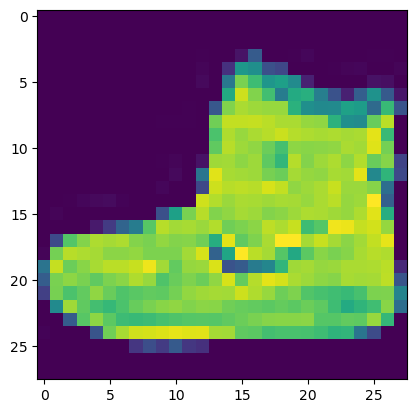

In [5]:
#print customizations
np.set_printoptions(linewidth=320)

#watching the bits like image
print(f'training image:\n {training_images[0]}')
print(f'training label: {training_labels[0]}')

#actual image
plt.imshow(training_images[0])

In [5]:
#ssimple nomalise
training_images = training_images / 255.0
test_images = test_images / 255.0

In [7]:
#basic ann based on softmax, later add more hidden layers
#see if accuray increases
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

2022-11-24 19:22:34.851871: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-24 19:22:34.853007: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-24 19:22:34.853154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MY_SURFACE): /proc/driver/nvidia/version does not exist
2022-11-24 19:22:34.856794: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
#basic cnn
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu',
                                                           input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

2022-11-25 20:38:57.876655: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-25 20:38:57.877846: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-25 20:38:57.877958: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MY_SURFACE): /proc/driver/nvidia/version does not exist
2022-11-25 20:38:57.880879: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [8]:
# testing softmaxx
# algo to rem: give inputs as tensors, pass to sftmax, get argmax
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# sum of all probabilities after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [8]:
#trying out tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [5]:
#how to stop at some epochs if some accuracy reached ?
#use callbaks
from custom_callbacks import custom_accuracy_callback

callback = custom_accuracy_callback(0.93)

In [9]:
#compiling and fitting, why we compile ? to run natively
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 10,
          callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4688 - accuracy: 0.8297
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3182 - accuracy: 0.8834
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2723 - accuracy: 0.8995
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2441 - accuracy: 0.9090
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2201 - accuracy: 0.9171
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1997 - accuracy: 0.9263
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1826 - accuracy: 0.9326


In [12]:
# eevaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.2879 - accuracy: 0.9064


[0.28792405128479004, 0.9064000248908997]

In [13]:
model.predict(test_images)[0].argmax()

313/313 [==============================] - 2s 5ms/step


9

In [14]:
test_labels[0]

9

In [ ]:
# what if we remove Flatten layer ? 
# doing 28 layers of 28 neuurs , too late, also 1st layer same sa input shape
#but does flattening remove spatial information about neighbbourhood bits ?
#yes it is a trade we r making

In [28]:
#adding more layers, expecting more accuracy !!, it didn't improve ? why ?
#adding more layers benifits complex data
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [29]:
#compiling and fitting
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4857 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3629 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3267 - accuracy: 0.8796
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3038 - accuracy: 0.8877
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2865 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2696 - accuracy: 0.8985
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2603 - accuracy: 0.9022
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2470 - accuracy: 0.9068
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2388 - accuracy: 0.9095
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [16]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


<b>visualize conv and pool</b>

1/1 [==============================] - 0s 22ms/step


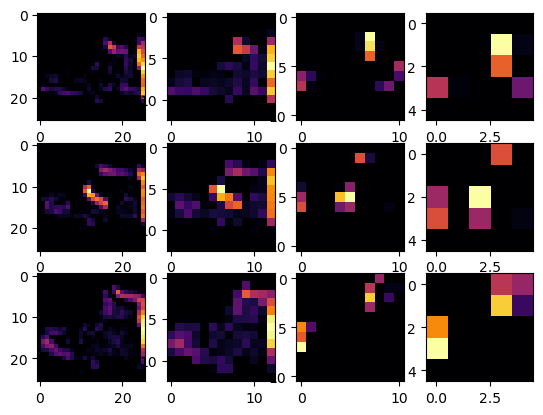

In [20]:
#this plot generates a conv a pool then a conv a pool
#from the model we defined above
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)